In [36]:
import pandas as pd
import numpy as np

In [37]:
train_data = pd.read_csv("../data/vct_2023/processed_data/AvsB_train_data_players_stats_eco_SK_rounds.csv")
test_data = pd.read_csv("../data/vct_2023/processed_data/AvsB_test_data_players_stats_eco_SK_rounds.csv")

In [39]:
game_id_columns = ["Tournament", "Stage", "Match Type", "Match Name", "Team_A", "Team_B"]
map_composition = ["Map", "Composition_A", "Composition_B"]
outcome_columns = ["Team_A_score_diff", "Team_B_score_diff", "Team_A_win", "Team_B_win"]

In [52]:
train_input = train_data.drop(game_id_columns+map_composition+outcome_columns, axis=1)
train_target_A = train_data["Team_A_win"]
train_target_B = train_data["Team_B_win"]

test_input = test_data.drop(game_id_columns+map_composition+outcome_columns, axis=1)
test_target_A = test_data["Team_A_win"]
test_target_B = test_data["Team_B_win"]

In [41]:
train_input.shape

(746, 164)

In [42]:
test_input.shape

(84, 164)

In [53]:
assert len(train_input.keys()) == len(test_input.keys()), "The number of train and test input are different."
assert set(train_input.keys()) == set(test_input.keys()), "Train and test have different input feature."
assert len(train_input) == len(train_target_B), "Train input and target sizes are different."
assert len(test_input) == len(test_target_B), "Test input and target sizes are different."

In [48]:
# Check if input has non numeric features.

from pandas.api.types import is_numeric_dtype

for key in train_input.keys():
    if not is_numeric_dtype(train_input[key]):
        print(key, "is not numeric.")

In [50]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


0.6428571428571429

*Train two GradientBoostingClassifiers:*

- Both have the same train input, but one predicts "Team_A_win" and the other predicts "Team_B_win"
- Two models have almost the same performance.
- Feature importances are not exactly the same, but the top most importance features are the same.

In [54]:
gbcA = GradientBoostingClassifier(n_estimators=500)

gbcA.fit(train_input, train_target_A)
gbc_pred_A = gbcA.predict(test_input)
gbc_acc_A = accuracy_score(test_target_A, gbc_pred_A)

print("predicting Team A win accuracy:", gbc_acc_A)
print("mean of test target:", np.mean(test_target_A))

predicting Team A win accuracy: 0.6309523809523809


In [57]:
gbcB = GradientBoostingClassifier(n_estimators=500)

gbcB.fit(train_input, train_target_B)
gbc_pred_B = gbcB.predict(test_input)
gbc_acc_B = accuracy_score(test_target_B, gbc_pred_B)

print("predicting Team B win accuracy:", gbc_acc_B)
print("mean of test target:", np.mean(test_target_B))

predicting Team B win accuracy: 0.6309523809523809


In [62]:
feature_names = train_input.keys()
gbcA_feature_importances = gbcA.feature_importances_

gbcA_feature_importance_dict = dict(zip(feature_names, gbcA_feature_importances))
gbcA_sorted_features = sorted(gbcA_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

A_important_features_in_order = [x[0] for x in gbcA_sorted_features]

for feature, importance in gbcA_sorted_features:
    print(f"{feature}: {importance}")

eco_rating_A: 0.6010235222503177
eco_rating_B: 0.0897004492737888
Kills Per Round_A: 0.07254780881420554
Kills Per Round_B: 0.048146497308104934
Rating_A: 0.0325334354826335
Average Combat Score_B: 0.029094660484180527
Average Combat Score_A: 0.013342030367028442
R3_lo_B: 0.012829802540833945
Clutch Success %_B: 0.01205883319057398
Clutch Success %_A: 0.0080393426712549
Rating_B: 0.007263599208919777
R3_lo_A: 0.005683895855560642
Assists Per Round_A: 0.005072110792795694
Average Damage Per Round_A: 0.004525288676934957
R4_Special_Kills_A: 0.004405581612642989
R2_lo_B: 0.004065153643881855
R2_lo_A: 0.003550229006662639
Assists Per Round_B: 0.003224280794233493
Headshot %_A: 0.0031910734991574975
sent_Average Damage Per Round_B: 0.002412511481653275
duel_First Kills Per Round_B: 0.002257664984993997
cont_Clutch Success %_A: 0.0020567731244820913
Kill, Assist, Trade, Survive %_A: 0.00175648447503682
R5_lo_B: 0.0016885426311389728
init_Average Damage Per Round_A: 0.0016676848095513008
init

In [63]:
gbcB_feature_importances = gbcB.feature_importances_

gbcB_feature_importance_dict = dict(zip(feature_names, gbcB_feature_importances))
gbcB_sorted_features = sorted(gbcB_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

B_important_features_in_order = [x[0] for x in gbcB_sorted_features]

for feature, importance in gbcB_sorted_features:
    print(f"{feature}: {importance}")

eco_rating_A: 0.6009696584144684
eco_rating_B: 0.08975448746663177
Kills Per Round_A: 0.07246265642006013
Kills Per Round_B: 0.046961554049968
Rating_A: 0.03253021655864549
Average Combat Score_B: 0.03024496742398459
Average Combat Score_A: 0.013179233830618019
R3_lo_B: 0.012828489170493734
Clutch Success %_B: 0.012047320528377203
Clutch Success %_A: 0.008010965661612442
Rating_B: 0.007263287287016599
R3_lo_A: 0.005356013165263008
Assists Per Round_A: 0.005069983723564984
Average Damage Per Round_A: 0.004534600916306702
R4_Special_Kills_A: 0.004405599334404603
R2_lo_B: 0.0038884335261518002
R2_lo_A: 0.003550368591602062
Assists Per Round_B: 0.0031405977071929797
Headshot %_A: 0.003065143804016942
sent_Rating_B: 0.002403995145200247
cont_Clutch Success %_A: 0.002210568979219292
duel_First Kills Per Round_B: 0.0021801172300105445
Kill, Assist, Trade, Survive %_A: 0.0017401270850838596
cont_Average Combat Score_B: 0.0017137319919893292
init_Kill, Assist, Trade, Survive %_B: 0.001709888028

In [71]:
num_of_features = len(train_input.keys())
for i in range(num_of_features):
    if A_important_features_in_order[:i] != B_important_features_in_order[:i]:
        print(f"The first {i} important features of gbcA and gbcB agree.")
        print("They are")
        print(A_important_features_in_order[:i])
        break

The first 21 important features of gbcA and gbcB agree.
They are
20
20


Since there was no big performance difference between predicting "Team_A_win" vs "Team_B_win".  From now on, our target will be "Team_A_win".

Also, let's use the above 20 features to train GradientBoostingClassifier.

In [73]:
important_features = A_important_features_in_order[:20]

gbc_X_train = train_input[important_features]
gbc_X_test = test_input[important_features]

y_train = train_data["Team_A_win"]
y_test = test_data["Team_A_win"]

In [75]:
small_gbc = GradientBoostingClassifier(n_estimators=1000)

small_gbc.fit(gbc_X_train, y_train)
small_gbc_pred = small_gbc.predict(gbc_X_test)
small_gbc_acc = accuracy_score(y_test, small_gbc_pred)

small_gbc_acc

0.6309523809523809

In [84]:
n_estimators_list = [300, 1000, 1500]
learning_rate_list = [0.05, 0.1, 1.5, 2]
max_depth_list = [1, 2, 3]

best_accuracy = 0
best_params = {}

# Iterate over hyperparameter combinations
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for max_depth in max_depth_list:
            # Initialize GradientBoostingClassifier with current hyperparameters
            clf = GradientBoostingClassifier(n_estimators=n_estimators,
                                             learning_rate=learning_rate,
                                             max_depth=max_depth)
            # Train the classifier on the training data
            clf.fit(gbc_X_train, y_train)
            
            # Evaluate the classifier on the test set
            y_pred = clf.predict(gbc_X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Check if current hyperparameters yield better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_estimators': n_estimators,
                               'learning_rate': learning_rate,
                               'max_depth': max_depth}

# Train the final classifier with the best hyperparameters on the entire training set
final_clf = GradientBoostingClassifier(**best_params)
final_clf.fit(gbc_X_train, y_train)

# Evaluate the final classifier on the test set
y_test_pred = final_clf.predict(gbc_X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'n_estimators': 300, 'learning_rate': 1.5, 'max_depth': 1}
Test Accuracy: 0.6547619047619048


In [ ]:
Best Hyperparameters: {'n_estimators': 300, 'learning_rate': 1.5, 'max_depth': 1}
Test Accuracy: 0.6547619047619048

- Previously, we saw that interaction terms, such as "sent_Rating_B" and "cont_Clutch Success %_A," are less important than straightforward terms, such as "Rating_B" and "Clutch Success %_A.

- Also, "eco_rating_A", "eco_rating_B", "R2_lo_A", "R2_lo_B", "R3_lo_A", and "R3_lo_B" didn't come from players' stats, but they have higher importance than others. Hence, we will try to use these features together with straightforward players' stats, such as "Rating_A" and "Average Combat Score_A," and so on.

In [90]:
eco_simple_stats = ["eco_rating_A", "eco_rating_B", "R2_lo_A", "R2_lo_B", "R3_lo_A", "R3_lo_B",
                    "Rating_A", "Average Combat Score_A", "Kill, Assist, Trade, Survive %_A",
                    "Average Damage Per Round_A", "Kills Per Round_A",
                    "Assists Per Round_A", "First Kills Per Round_A",
                    "First Deaths Per Round_A", "Headshot %_A",
                    "Clutch Success %_A",
                    "Rating_B", "Average Combat Score_B", "Kill, Assist, Trade, Survive %_B",
                    "Average Damage Per Round_B", "Kills Per Round_B",
                    "Assists Per Round_B", "First Kills Per Round_B",
                    "First Deaths Per Round_B", "Headshot %_B",
                    "Clutch Success %_B"]

es_X_train = train_data[eco_simple_stats]
es_X_test = test_data[eco_simple_stats]

y_train = train_data["Team_A_win"]
y_test = test_data["Team_A_win"]

In [110]:
es_gbc = GradientBoostingClassifier(n_estimators=1100, max_depth=1)

es_gbc.fit(es_X_train, y_train)
es_gbc_pred = es_gbc.predict(es_X_test)
es_gbc_acc = accuracy_score(y_test, es_gbc_pred)

es_gbc_acc

0.6428571428571429

0.63 accuracy above is not bad without hyper parameter tuning.

In [99]:
# Let's do hyper parameter tuning!

n_estimators_list = [250, 750, 800, 850, 900, 1000, 2000]
learning_rate_list = [0.5, 1, 1.5]
max_depth_list = [1, 2, 3]

best_accuracy = 0
best_params = {}

# Iterate over hyperparameter combinations
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for max_depth in max_depth_list:
            # Initialize GradientBoostingClassifier with current hyperparameters
            clf = GradientBoostingClassifier(n_estimators=n_estimators,
                                             learning_rate=learning_rate,
                                             max_depth=max_depth)
            # Train the classifier on the training data
            clf.fit(es_X_train, y_train)
            
            # Evaluate the classifier on the test set
            y_pred = clf.predict(es_X_test)
            accuracy = accuracy_score(y_test, y_pred)
            
            # Check if current hyperparameters yield better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'n_estimators': n_estimators,
                               'learning_rate': learning_rate,
                               'max_depth': max_depth}

# Train the final classifier with the best hyperparameters on the entire training set
final_clf = GradientBoostingClassifier(**best_params)
final_clf.fit(es_X_train, y_train)

# Evaluate the final classifier on the test set
y_test_pred = final_clf.predict(es_X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'n_estimators': 250, 'learning_rate': 1, 'max_depth': 1}
Test Accuracy: 0.6547619047619048


In [ ]:
Best Hyperparameters: {'n_estimators': 350, 'learning_rate': 0.5, 'max_depth': 1}
Test Accuracy: 0.6666666666666666

In [ ]:
Best Hyperparameters: {'n_estimators': 500, 'learning_rate': 1, 'max_depth': 1}
Test Accuracy: 0.6547619047619048

In [ ]:
Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.5, 'max_depth': 2}
Test Accuracy: 0.6547619047619048

In [ ]:
Best Hyperparameters: {'n_estimators': 1000, 'learning_rate': 0.1, 'max_depth': 1}
Test Accuracy: 0.6428571428571429

In [ ]:
raise ValueError("Stop running here!")

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

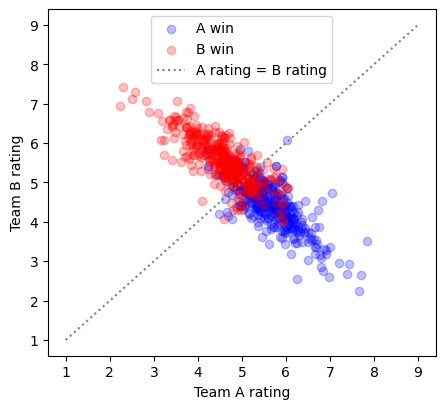

In [140]:
alpha = 0.25
plt.figure(figsize=(5,4.5))
plt.scatter(
    train_data[train_data.Team_A_win == True].Rating_A,
    train_data[train_data.Team_A_win == True].Rating_B,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    train_data[train_data.Team_A_win == False].Rating_A,
    train_data[train_data.Team_A_win == False].Rating_B,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(1,10), range(1,10), linestyle="dotted", color="grey", label="A rating = B rating")
plt.legend(loc="upper center")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")
plt.show()

In [77]:
# # Define the Gradient Boosting Classifier
# gbc = GradientBoostingClassifier()

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [300, 400, 500],
#     'learning_rate': [0.1, 0.2, 0.3],
#     'max_depth': [1, 2]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=None)

# # Perform Grid Search
# grid_search.fit(gbc_X_train, y_train)

# # Print the best hyperparameters
# print("Best Parameters:", grid_search.best_params_)

# # Evaluate the model on the test set
# best_clf = grid_search.best_estimator_
# test_score = best_clf.score(gbc_X_test, y_test)
# print("Test Accuracy:", test_score)

Best Parameters: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 300}
Test Accuracy: 0.6190476190476191
